<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Data%20Structure%20and%20Algorithms/Week_14_Memory_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The Heap Space contains all objects are created
- Stack contains any reference (variable) to those objects. 

> Objects stored in the Heap can be accessed throughout the application. Primitive local variables are only accessed the Stack Memory blocks that contain their methods.

<fieldset>

To make it simple,

- Heap is a data type or object (such as variable, dict, integer, str,  class etc.)
- Stack is a reference (variable)

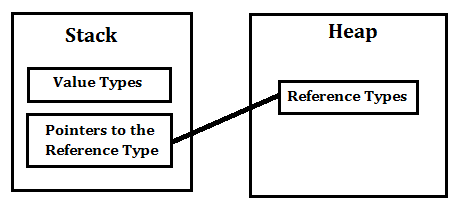

Suppose A = 3, then A will be stored in Stack memory, and int 3 will be the reference

<u>Ex 1</u> :

In [ ]:
class Employee:
  def __init__(self,name,age):
    self.name = name
    self.age = age
  
e= Employee('Saran',20)

> when e is created, it will be stored in somewhere in the **Heap memory**, as we known that the heap memory stores the object



---



<u>Ex 2</u> :

<font size="5"> Heap memory

> Case 1 : If all variables are store the same value

In [ ]:
# stack (variable) = heap (reference) 


var1 = 100
var2 = var1
var3 = 100

In [ ]:
# Memory location address will point to just one address

print(id(var1))

print(id(var2))

print(id(var3))

94140068783712
94140068783712
94140068783712


In [ ]:
# ! All point to same memory address

> Case 2 : If all variables are store the different value

In [ ]:
var1 = 100
var2 = var1

#Now var3 changed the value
var3 = 105

In [ ]:
# Memory location address will point to just different addresses now, since var3 point at a difference
print(id(var1))

print(id(var2))

print(id(var3))

94140068783712
94140068783712
94140068783872




---



<u>Ex 3:</u>



<font size="5"> Stack Memory

> Now, let's check the reference counts

In [ ]:
import sys

sys.getrefcount(var1)

173

- currently we have 178 reference counts of var1, and suppose we assigned one more variable (var4) which has the same value as var 1

- The integer 100 has **173 reference counts**, (which two of them including in var 1

In [ ]:
var4 = var1

sys.getrefcount(var1)

174

In [ ]:
# This is why heap memory is flexible because the memory size can be changed

# Remove var4 to reduce memory size
del var4

sys.getrefcount(var1)

173

In [ ]:
sys.getrefcount(var2)

173



---



<u><font size="5"> Type of object

> stored in stack memory

1. Simple Object (Number, strings, boolean etc.)

2. Container objects (Lists, Dictionaries, Tuple, set etc.)

3. User-Defined custom classes (Employee class etc.)



---



---



<u><font size="5"> Tips to speed up Python code

<u>Ex 1:</u>

<font color='tomato'><font size="5"> Problem: High memory footprint


In [ ]:
msg = 'line1\n'
print(id(msg))   #'line1\n' stored in this heap memo address

msg += 'line2\n'
print(id(msg))   #'line1\nline2\n' stored in this heap memo address

msg += 'line3\n'
print(id(msg))   #'line1\nline2\nline3\n' stored in this heap memo address


140371399815664
140371399524400
140371399605344


- This is inefficient, since the old msg will get copied and will be reuseed, which waste al lot of time, which cause the momory footprint

> These above code used a lot of heap memory

<font color='spinach'><font size="5"> Solution:

In [ ]:
msg = ['line1','line2','line3']
'\n'.join(msg)

'line1\nline2\nline3'

- This is better, we don't have to copy the str again and again, but rather we just join 



---



<u>Ex 2:</u>

In [ ]:
my_var = 'nice'

Better avoid use concateness or + operator on strings

In [ ]:
#slow

msg = 'hello' + my_var + 'world'

In [ ]:
# faster
msg = 'hello {} world'.format(my_var)

'hello nice world'

In [ ]:
# and even more faster
msg = 'hello %s world' % my_var

'hello nice world'

In [ ]:
# the fastest (called f-strings)

msg = f'hello {my_var} world'

<fieldset>

So, here is the ranking from the slowest to the fastest

1. Using Concateness or '+' operator 🤭
2. using format function
3. Using %
4. Using f-strings 🥇



---



<u>Ex 3:</u>

if variable == True: is slower than if variable:

In [ ]:
#Slow

flag = True

if flag == True:
    print("This works, but is not the preferred PEP 8 pattern")


In [ ]:
#faster

flag = True

if flag:
    print("PEP 8 Style Guide prefers this pattern")



---



<u>Ex 4:</u>

List comprehensions are known to perform, in general, better than for loops as they do not need to call the append function at each iteration

In [ ]:
# slow ( for loop list )

x = [1, 2, 3, 4, 5, 6]
result = []

for idx in range(len(x)):
  result.append(x[idx]*2)

print(result)


[2, 4, 6, 8, 10, 12]


In [ ]:
x = [1, 2, 3, 4, 5, 6]

result = [(element * 2) for element in x]

print(result)

[2, 4, 6, 8, 10, 12]




---



<u>Ex 5:</u>

ref: https://stackoverflow.com/questions/22442378/what-is-the-difference-between-sortedlist-vs-list-sort

> For lists, list.sort() is faster than sorted() because it doesn't have to create a copy. For any other iterable, you have no choice.

In [ ]:
mylist = [58, 9, 16, 25]
mylist.sort()
mylist

[9, 16, 25, 58]

In [ ]:
mylist2 = [58, 9, 16, 25]
sorted(mylist2)
mylist2

#If you want to do like sort

mylist2 = sorted(mylist2)
mylist2


[9, 16, 25, 58]



---



---



<u><font size="5"> How to capture the run time

Using **timeit** built-in function which ignore, which is more accurate than **time**
<fieldset>

timeit is more accurate, for three reasons:

1. it repeats the tests many times to eliminate the influence of other tasks on your machine, such as disk flushing and OS scheduling.

2. it disables the garbage collector to prevent that process from skewing the results by scheduling a collection run at an inopportune moment.

3. it picks the most accurate timer for your OS, time.time or time.clock in Python 2 and time.perf_counter() on Python 3. See timeit.default_timer.
</fieldset>

ref: https://stackoverflow.com/questions/17579357/time-time-vs-timeit-timeit

In [ ]:
import timeit

starttime = timeit.default_timer()

oldlist = ['hello','my','world']
newlist = []

for word in oldlist:
  newlist.append(word.upper())

endtime = timeit.default_timer()

print(f'elapsed time = {endtime-starttime}')

elapsed time = 0.00014443300005950732


In [ ]:
#slow
starttime = timeit.default_timer()

msg = 'hello' + my_var + 'world'

endtime = timeit.default_timer()

print(f'elapsed time = {endtime-starttime}')

elapsed time = 5.269999928714242e-05


In [ ]:
# faster
starttime = timeit.default_timer()
msg = 'hello {} world'.format(my_var)

endtime = timeit.default_timer()

print(f'elapsed time = {endtime-starttime}')  

elapsed time = 0.001318340000580065


In [ ]:
# and even more faster
starttime = timeit.default_timer()

msg = 'hello %s world' % my_var

endtime = timeit.default_timer()

print(f'elapsed time = {endtime-starttime}')

elapsed time = 7.682999967073556e-05


In [ ]:
# the fastest (called f-strings)
starttime = timeit.default_timer()

msg = f'hello {my_var} world'

endtime = timeit.default_timer()

print(f'elapsed time = {endtime-starttime}')

elapsed time = 8.560300011595245e-05




---



---



<u><font size="5"> Using Generators

> unlike function, Generators iteratively return multiple times (using **yield** keyword)

> This mean that if you have a large dataset, you don't have to wait fo the entire dataset to be accessible

In [ ]:
# define the generator

def series_generator(low, high):
  while low <= high:
    yield low**2
    low += 1

In [ ]:
#Using range

n_list = []

for num in range(1, 10):
  n_list.append(num**2)

print(n_list)

[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
#Using generator to append

n_list = []

for num in series_generator(1,10):
  n_list.append(num)

print(n_list)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
